# Data-Driven Exploration of Survival Patterns on the Titanic
Fall 2025 Data Science Project

Johann Kuruvilla & Raghavendra Pavan Sunkara

## Contributions

**Johann Kuruvilla**  
Johann Kuruvilla: Johann was primarily responsible for acquiring and preparing the Titanic Passenger and Crew dataset (B). Johann then led the data cleaning and preprocessing process (C). Following this, he conducted exploratory data analysis to examine patterns in survival outcomes, including relationships with gender, class, and fare, using statistical tests, and created visualizations to highlight these trends. He also interpreted the results of these analyses, explaining how differences in demographics and economic status affected survival odds. Finally, he helped compile and format the final report and tutorial, integrating all sections into a cohesive document that clearly communicates the methodology, analyses, and insights.

**Raghavendra Pavan Sunkara**  
Raghavendra Pavan Sunkara: Worked on ML Algorithm Design/Development (D), ML Algorithm Training and Test Data Analysis (E), and Visualization, Result Analysis, Conclusion (F) on this assignment. Pavan made the decision to utilize logistic regression for the ML model to see how each feature impacted odds of survival for passengers that had a specific feature. Additionally, Pavan trained the dataset and then put together a graph illustrating each feature’s survival odds (how a given feature affected passengers within the group’s chances of survival).

**Collaboration**  
Johann and Pavan worked together on various parts of the tutorial to ensure consistency and clarity in the final document.

## Introduction

  The sinking of the RMS Titanic in 1912 remains one of the most infamous maritime disasters in modern history. The records of who survived and who passed away in the tragedy provide an opportunity to investigate how social, economic, and demographic factors shaped each person’s chances of surviving the Titanic’s sinking. In this project, we used the Titanic Passenger and Crew dataset from Kaggle to explore whether characteristics such as gender, socioeconomic class, and ticket cost had any correlation with odds of survival.
  Our analysis centers around three guiding research questions:
  1. Did survival likelihood differ between men and women aboard the Titanic?
  2. Was passenger class associated with the probability of survival?
  3. Were passengers who paid higher fares more likely to survive?

  These questions matter because they connect the historical event to broader issues of inequality, resource allocation, and structural privilege. Disasters often magnify existing social hierarchies, and by examining patterns on the Titanic, we can better understand how demographic and economic factors make a difference in crisis survival.
  
  To address these questions, we constructed a complete data science pipeline. The dataset was acquired directly through KaggleHub for reproducibility, cleaned extensively to resolve missing or inconsistent values, and preprocessed to standardize key variables such as gender, class, and fare price. We then applied statistical methods tailored to the type of data and research question: a Chi-square test to compare survival rates between men and women, a one-way ANOVA to compare survival rates across first, second, and third class passengers, and a Mann-Whitney U test to examine differences in fare prices between those who survived and those who passed away..
  
  Together, these analyses allow us to evaluate the role that gender, socioeconomic status, and wealth had on a given passenger’s odds of surviving the Titanic’s sinking. The results show distinct patterns that reflected the social context of 1912.


## Data Curation

  Before conducting any statistical analysis, the Titanic dataset required extensive cleaning and preprocessing to ensure accuracy, consistency, and interpretability. The raw Passenger and Crew dataset, downloaded programmatically using KaggleHub, contained over two thousand entries with varying levels of completeness, a mixture of numeric and text-based fields, and inconsistent formatting. These issues rendered the existing dataset unusable, so data curation was required in order to standardize the dataset and deal with malformed data that could impede the data analysis process.
  
  The dataset was downloaded directly from Kaggle. After extraction, the main data file, PassengerCrew.csv, was loaded into a pandas DataFrame. After looking at the data set, we saw that essential demographic, socioeconomic, and occupational variables, such as class, gender, fare price, and each passenger’s fate were available within the dataset.
  
  To maintain consistency and prevent errors during analysis, we got rid of all of the whitespace in each column’s name. Duplicate records were removed to prevent potential group misinterpretation. Rows missing essential variables (such as Status, Crew/Passenger, Gender, and Fare Price) were also dropped, since these fields were required to separate data into the different groups that we wanted to look at. We also deleted the “Profile on Encyclopedia Titanica” column entirely because it contained links that did not matter for the purposes of our data analysis.

**Dataset citations:**  
- [Johann's Kaggle Dataset](https://www.kaggle.com/datasets/johannkay/titanic-passenger-and-crew-data)  
- [Pavan's Kaggle Dataset](https://www.kaggle.com/datasets/pavansunkara082/titanic-passengers-and-crew-data/data)

  The Fare Price column involved a complex data curation process, more so than any of the other columns. The dataset stored fares in many different British currency formats, often mixing pounds, shillings, and pence in text-based entries. To ensure that the inconsistent currency formats did not pose a problem in data analysis, we created a parsing function that removed the pound symbol and then extracted the value for the pounds, shillings, or pence quantity using regular expressions. We then converted all values into a consistent numeric format in decimal pounds, where 20 shillings/240 pence were both equal to 1 pound.
  
  Missing fare values were imputed using a hierarchical strategy designed to preserve the dataset’s underlying economic structure. First, any missing value was replaced with the median fare of the Class/Job group that a given passenger belonged to. If that information was unavailable, the median fare of only the passenger class that the passenger belonged to was used. If class-based medians were not sufficient, the median for the given job category was used instead, and any remaining gaps were finally resolved using the overall dataset median. This multi-stage approach made sure that each data point relied on the most contextually meaningful information possible while maintaining internal consistency in the fare distribution.
  
  Certain entries did not have values for the Class / Department column. Because passenger class was necessary for our ANOVA analysis and reflected socioeconomic status, it was important to reconstruct these values carefully. We coded an inference function that identified the most common class amongst passengers sharing the same job, tried to infer class based on the person’s job if the most common class for passengers sharing the same job was unavailable, and if that wasn’t available, then the nearest fare price by absolute difference was found, and the given entry was assigned the class that provided the closest match. This allowed us to preserve both occupational and economic relationships in the reconstructed class assignments.
  
  Gender labels were inconsistent (some of these labels could show as any of “M”, “man”, “Women”, “f”), so all entries were converted to lowercase and mapped to standardized categories (“male”, “female”). Only rows with valid gender and survival information were retained.
  
  The survival outcome was then converted into a binary variable, with 1 representing a survivor and 0 representing a victim. This binary encoding was required in order to successfully perform the statistical tests that were performed later on.
  
  Additional filtering was done, depending on the analysis that was being performed. For the ANOVA test, only passengers in 1st, 2nd, or 3rd class were included. For the Mann-Whitney U test, only rows with valid fare and survival values were preserved. These tailored subsets ensured that each test used the appropriate data and preserved the integrity of categorical groupings.



Here, we use the specified KaggleHub library to automatically download the Titanic Passenger and Crew dataset directly from Kaggle. By calling kagglehub.dataset_download("johannkay/titanic-passenger-and-crew-data"), the dataset is located, fetched, and extracted into your working environment without requiring any manual uploads. The resulting file path is stored in the variable path, which can be used later to access the dataset (for example, when loading the PassengerCrew.csv file into a pandas DataFrame). This approach keeps the workflow reproducible and efficient, ensuring that the most recent version of the dataset is always used.

In [ ]:
import kagglehub
path = kagglehub.dataset_download("johannkay/titanic-passenger-and-crew-data")

Using Colab cache for faster access to the 'titanic-passenger-and-crew-data' dataset.


This code block imports the essential data-handling libraries pandas and NumPy, which are used throughout the analysis for data manipulation and numerical operations. The pandas library provides the read_csv() function, which reads the PassengerCrew.csv file and loads it into a DataFrame — a powerful table-like data structure ideal for organizing and exploring datasets. The resulting DataFrame, stored in the variable df, contains all rows and columns from the Titanic Passenger and Crew dataset. Displaying df at the end allows for a quick preview of the dataset, confirming that it has been loaded correctly and providing an initial look at its structure and contents before cleaning or preprocessing.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('PassengerCrew.csv')
df

,Titanic passager,Status,Disembarked at,Home Country,Age,Year of Birth,Crew or Passenger?,Gender,Class / Department,Embarked,Job,Job details,Ticket Number,Fare Price,Profile on Encyclopedia Titanica
0,"DE GRASSE, Mr J.",NaN,Cherbourg,NaN,NaN,NaN,Passenger,Male,2nd Class,Southampton,NaN,NaN,761,£1,http://www.encyclopedia-titanica.org/titanic-b...
1,"EVANS, Miss",NaN,Cherbourg,NaN,NaN,NaN,Passenger,Female,2nd Class,Southampton,NaN,NaN,88,£1,http://www.encyclopedia-titanica.org/titanic-b...
2,"MULLEN,",NaN,Cherbourg,NaN,NaN,NaN,Passenger,Female,2nd Class,Southampton,NaN,NaN,404,£1,http://www.encyclopedia-titanica.org/titanic-b...
3,"WOTTON, Mr Henry Swaffin",NaN,Cherbourg,NaN,54.0,1858.0,Passenger,Male,1st Class,Southampton,Butcher,Butcher's Shop Proprietor,86,£1 10s,http://www.encyclopedia-titanica.org/titanic-c...
4,"BRAND, Mr",NaN,Cherbourg,NaN,NaN,NaN,Passenger,Male,1st Class,Southampton,NaN,NaN,8,£1 10s,http://www.encyclopedia-titanica.org/titanic-b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,"DUFFY, Mr William Luke",Victim,Not Disembarked,England,36.0,1875.0,Crew,Male,Engineering Crew,Belfast,"Writer, Clerk",Writer / Engineer's Clerk,NaN,NaN,http://www.encyclopedia-titanica.org/titanic-v...
2452,"COLLIS, Mr",NaN,Cherbourg,NaN,NaN,NaN,Passenger,Male,1st Class,Southampton,NaN,NaN,7,NaN,http://www.encyclopedia-titanica.org/titanic-b...
2453,"STEVENS, Mr G.",NaN,Cherbourg,NaN,NaN,NaN,Passenger,Male,1st Class,Southampton,NaN,NaN,50,NaN,http://www.encyclopedia-titanica.org/titanic-b...
2454,"CAMPBELL, Mr William Henry",Victim,Not Disembarked,Northern Ireland,21.0,1890.0,Passenger,Male,2nd Class,Belfast,NaN,NaN,239853,NaN,http://www.encyclopedia-titanica.org/titanic-v...


Here, we perform the main data preprocessing and cleaning for the Titanic Passenger and Crew dataset, preparing it for analysis. It begins by importing several key Python libraries: pandas and NumPy for data handling, re for regular expressions used in text parsing, seaborn and matplotlib for visualizations, and scipy.stats for statistical testing. The dataset is loaded into a pandas DataFrame, and the column names are stripped of extra spaces to ensure consistency. Duplicate entries are removed to avoid redundancy, and any rows missing crucial information in the “Status” or “Crew or Passenger?” columns are dropped, as these are essential for later analysis. Additionally, the “Profile on Encyclopedia Titanica” column is removed since it contains URLs that don’t contribute to the statistical evaluation.

Next, the code defines a custom function, convert_fare(), which standardizes the Fare Price column by converting historical British currency formats (pounds, shillings, and pence) into a single decimal value in pounds. This ensures that all fare values are uniform and numerically comparable. The missing fare values are then imputed through a multi-step process: first by taking the median fare for passengers sharing the same “Class / Department” and “Job,” then by class alone, then by job alone, and finally filling any remaining missing values with the dataset’s overall median fare.

The final part defines another function, infer_class(), which estimates missing values in the Class / Department column based on related information. It uses the most common class among passengers with the same job or job details, and if that’s not available, it finds the nearest fare value in the dataset and assigns the corresponding class. By doing so, the code ensures that even incomplete records are logically filled in based on related economic and occupational indicators. The resulting DataFrame is a cleaned, consistent dataset ready for exploration and statistical analysis.

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

df = pd.read_csv('PassengerCrew.csv')
df.columns = df.columns.str.strip()
df = df.drop_duplicates()
df = df.dropna(subset=['Status', 'Crew or Passenger?'])
if 'Profile on Encyclopedia Titanica' in df.columns:
    df = df.drop(columns=['Profile on Encyclopedia Titanica'])

def convert_fare(fare_str):
    if pd.isna(fare_str):
        return np.nan
    fare_str = str(fare_str).strip()
    fare_str = fare_str.replace('£', '')
    pounds = 0.0
    shillings = 0.0
    pence = 0.0
    pattern = r'(\d+)\s*(?:pounds?)?\s*(?:(\d+)s)?\s*(?:(\d+)d)?'
    match = re.match(pattern, fare_str)
    if match:
        if match.group(1):
            pounds = float(match.group(1))
        if match.group(2):
            shillings = float(match.group(2))
        if match.group(3):
            pence = float(match.group(3))
    total_pounds = pounds + shillings/20 + pence/240
    return total_pounds

df['Fare Price'] = df['Fare Price'].apply(convert_fare)
df['Fare Price'] = df.groupby(['Class / Department', 'Job'])['Fare Price'].transform(
    lambda x: x.fillna(x.median())
)
df['Fare Price'] = df.groupby('Class / Department')['Fare Price'].transform(
    lambda x: x.fillna(x.median())
)
df['Fare Price'] = df.groupby('Job')['Fare Price'].transform(
    lambda x: x.fillna(x.median())
)
df['Fare Price'] = df['Fare Price'].fillna(df['Fare Price'].median())

def infer_class(row):
    if pd.isna(row['Class / Department']):
        job = row['Job']
        if pd.notna(job):
            median_class = df[df['Job']==job]['Class / Department'].mode()
            if not median_class.empty:
                return median_class[0]
        job_det = row['Job details']
        if pd.notna(job_det):
            median_class = df[df['Job details']==job_det]['Class / Department'].mode()
            if not median_class.empty:
                return median_class[0]
        fare = row['Fare Price']
        if pd.notna(fare):
            nearest_idx = (df['Fare Price'] - fare).abs().idxmin()
            return df.loc[nearest_idx, 'Class / Department']
    return row['Class / Department']

df['Class / Department'] = df.apply(infer_class, axis=1)
df

,Titanic passager,Status,Disembarked at,Home Country,Age,Year of Birth,Crew or Passenger?,Gender,Class / Department,Embarked,Job,Job details,Ticket Number,Fare Price
7,"COLERIDGE, Mr Reginald Charles",Victim,Not Disembarked,England,29.0,1883.0,Passenger,Male,2nd Class,Southampton,Advertising Consultant,Advertising Consultant,14263,10.5
8,"STOKES, Mr Philip Joseph",Victim,Not Disembarked,England,25.0,1887.0,Passenger,Male,2nd Class,Southampton,Bricklayer,Bricklayer,13540,10.5
9,"REEVES, Mr David",Victim,Not Disembarked,England,36.0,1876.0,Passenger,Male,2nd Class,Southampton,"Carpenter, Joiner",Carpenter / Joiner,17248,10.5
10,"PARKER, Mr Clifford Richard",Victim,Not Disembarked,Channel Islands,28.0,1884.0,Passenger,Male,2nd Class,Southampton,Clerk,Clerk,14888,10.5
11,"MITCHELL, Mr Henry Michael",Victim,Not Disembarked,Channel Islands,71.0,1841.0,Passenger,Male,2nd Class,Southampton,Coach Painter,Coach Painter,24580,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,"HARDER, Mr William",Survivor,Not Disembarked,England,39.0,1872.0,Crew,Male,Deck Crew,Southampton,Window Cleaner,Window Cleaner,NaN,13.0
2450,"SAWYER, Mr Robert James",Victim,Not Disembarked,England,31.0,1880.0,Crew,Male,Deck Crew,Southampton,Window Cleaner,Window Cleaner,NaN,13.0
2451,"DUFFY, Mr William Luke",Victim,Not Disembarked,England,36.0,1875.0,Crew,Male,Engineering Crew,Belfast,"Writer, Clerk",Writer / Engineer's Clerk,NaN,13.0
2454,"CAMPBELL, Mr William Henry",Victim,Not Disembarked,Northern Ireland,21.0,1890.0,Passenger,Male,2nd Class,Belfast,NaN,NaN,239853,13.0


## Exploratory Data Analysis

  After curating and preparing the Titanic Passenger and Crew dataset, we conducted exploratory data analysis to better understand the structure of the data, identify key patterns, and justify our choice of statistical tests. Performing exploratory data analysis can show patterns between demographic, socioeconomic, and occupational variables and survival outcomes before applying any formal hypothesis testing.
  
  We began by comparing the amount of survivors to the amount of victims. A simple count plot or value counts summary showed that the majority of individuals aboard the Titanic did not survive. This imbalance is important for interpreting later analyses, particularly due to the fact that several statistical tests are sensitive to group size differences.
  
  Firstly, we explored survival rates of both men and women. The data showed that there was almost an equal number of men and women on the Titanic. When survival rates were blotted on a bar graph, it showed that the women of the Titanic had a much higher survival rate than the men on board the Titanic did. This pattern strongly suggested that there was a correlation between gender and survival odds, motivating our Chi-squared test later on.
  
  We also examined the distribution of passengers across the three main classes: 1st, 2nd, and 3rd class. While all three classes were represented, 3rd class had the largest number of individuals, followed by 1st and finally 2nd class. This distribution is historically accurate and helps contextualize the socioeconomic hierarchy aboard the Titanic.
  
  Plotting survival rates for each class during EDA revealed a visible gradient. Survival was highest in 1st class, moderate in 2nd, and lowest in 3rd class. This clear trend justified the use of one-way ANOVA to statistically test differences between the class survival means.
  
  Because fare values reflect socioeconomic standing in tandem with passenger class, we explored the distribution of Fare Price using histograms and boxplots. The distribution was heavily right-skewed, with most passengers paying relatively low fares and a small number of wealthy passengers paying extremely high prices. This non-normal distribution supported our choice of a non-parametric test (Mann-Whitney U) later when comparing fares between survivors and non-survivors.
  
  During EDA, plotting fare distributions by survival status showed that survivors tended to fall within higher fare ranges, although there was overlap between groups. This pattern helped reaffirm our hypothesis that higher economic status likely increased chance at survival.
  
  To understand the relationships between key variables, we also looked at pairwise visualizations such as survival vs. gender, survival vs. class, fare vs. class, and fare vs. survival.
  
  A violin plot or boxplot comparing fares by class showed clear separation between the economic tiers, confirming that fare is a reliable numeric representation aligning with socioeconomic status.
  
  Additionally, pivot tables and grouped summary stats were used to compute average survival rates for each demographic group, allowing a quick comparison of patterns before applying formal tests.
  
  Exploratory data analysis also allowed us to verify that fare values were reasonable after conversion from pounds, shillings, and pence; no extreme missing-data patterns remained after imputation; and that the inferred class assignments behaved consistently (e.g., inferred 1st-class fares fell within typical 1st-class fare ranges). This step gave confidence that the dataset was ready for inferential statistics.


In this section, we explore the relationship between gender and survival status using a chi-square test of independence. First, the Gender column was standardized by converting all entries to lowercase and unifying different representations of male and female. Any rows with missing gender or status data were removed to ensure the analysis was complete. We then created a binary Survived column, assigning 1 to survivors and 0 to victims. A contingency table was constructed to summarize the frequency of survivors and victims across gender categories. Using the chi2_contingency function from scipy.stats, we calculated the chi-squared statistic and associated p-value. The results indicated whether survival was statistically associated with gender. Finally, a bar plot visualized the survival rate by gender, providing a clear visual summary of the distribution differences. This analysis allows us to conclude whether gender played a significant role in survival on the Titanic.

This analysis examined the relationship between gender and survival using a Chi-squared test of independence, which is suitable for two categorical variables. The test assesses whether the distribution of survival outcomes differs by gender. The extremely high Chi-squared statistic (≈485.87) and an extremely small p-value (≈1.13×10E-107) indicate a highly significant association. We therefore reject the null hypothesis and conclude that gender had a strong effect on survival, with males and females showing notably different survival rates. The accompanying bar plot provides a visual representation of these differences, clearly showing higher survival rates among females compared to males.

Chi-Squared Test: Gender vs Survival
Chi-squared Statistic: 485.86554289434235
p-value: 1.1309166400962133e-107
Reject the null hypothesis, gender has an effect on survival


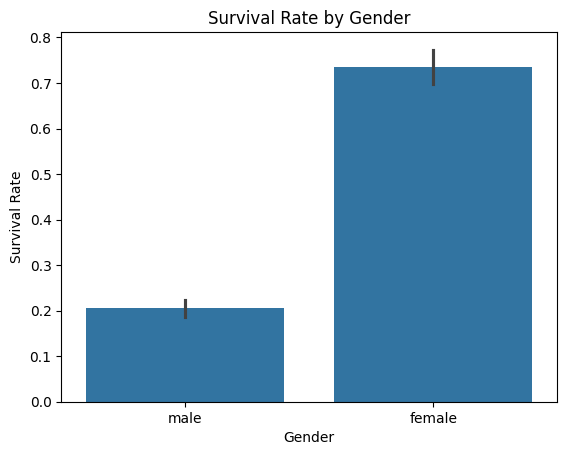

In [ ]:
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
df['Gender'] = df['Gender'].replace({
    'm': 'male', 'man': 'male', 'men': 'male',
    'f': 'female', 'woman': 'female', 'women': 'female'
})
df = df.dropna(subset=['Gender', 'Status'])
df['Survived'] = df['Status'].apply(lambda x: 1 if str(x).strip().lower() in ['survivor', 'survived'] else 0)
contingency = pd.crosstab(df['Gender'], df['Survived'])
chi, p, dof, expected = chi2_contingency(contingency)
print("Chi-Squared Test: Gender vs Survival")
print(f"Chi-squared Statistic: {chi}")
print(f"p-value: {p}")
if p < 0.05:
  print("Reject the null hypothesis, gender has an effect on survival")
else:
  print("Fail to reject the null hypothesis, gender does not affect survival")

sns.barplot(x='Gender', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

In this analysis, we investigate whether passenger class is associated with survival outcomes using a one-way ANOVA. First, the Class / Department and Status columns were standardized by stripping whitespace and converting to lowercase. Only passengers with a clear survival status of “survivor” or “victim” were retained, and a binary Survived column was created (1 for survivors, 0 for victims). The dataset was further filtered to include only the main passenger classes: 1st, 2nd, and 3rd class. To test whether survival rates differ across classes, the survival values for each class were grouped and compared using a one-way ANOVA, which calculates the F-statistic and p-value to determine if the differences between group means are statistically significant. The results indicate whether there is a significant variation in survival rates among passenger classes. To visualize these differences, a bar plot shows the average survival rate for each class, making it easy to see which class had higher or lower survival probabilities. This approach provides both a statistical and visual assessment of how passenger class influenced survival.

To explore whether passenger class influenced survival, a one-way ANOVA was performed, comparing average survival rates across first, second, and third classes. ANOVA is appropriate here because it tests for differences in means across more than two independent groups. The F-statistic (≈71.18) and very small p-value (≈4.47×10E-30) provide strong evidence that survival rates differed significantly between classes. Consequently, we reject the null hypothesis and conclude that passenger class affected survival, with higher classes having higher survival rates. The corresponding bar plot shows the average survival rate for each class, visually confirming the trend.

One-Way Anova Test: Class vs Survival
F-statistic: 71.17940526576999
p-value: 4.465029816231466e-30
Reject the null hypothesis as survival rates are different between classes.


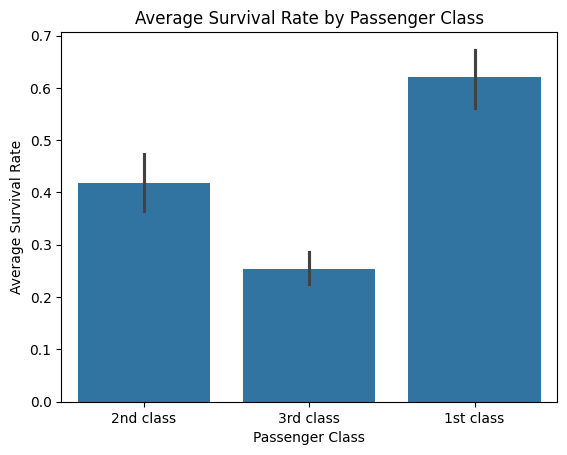

In [ ]:
from scipy.stats import f_oneway
df['Class / Department'] = df['Class / Department'].astype(str).str.strip().str.lower()
df['Status'] = df['Status'].astype(str).str.strip().str.lower()
df = df[df['Status'].isin(['survivor', 'victim'])]
df['Survived'] = df['Status'].apply(lambda x: 1 if x == 'survivor' else 0)
df = df[df['Class / Department'].isin(['1st class', '2nd class', '3rd class'])]
avg_survival = df.groupby('Class / Department')['Survived'].mean().reset_index()
first = df[df['Class / Department'] == '1st class']['Survived']
second = df[df['Class / Department'] == '2nd class']['Survived']
third = df[df['Class / Department'] == '3rd class']['Survived']
f, p = f_oneway(first, second, third)
print("One-Way Anova Test: Class vs Survival")
print(f"F-statistic: {f}")
print(f"p-value: {p}")
if p < 0.05:
    print("Reject the null hypothesis as survival rates are different between classes.")
else:
    print("Fail to reject the null hypothesis as survival rates are not different between classes.")
avg_survival = df.groupby('Class / Department')['Survived'].mean().reset_index()
sns.barplot(x='Class / Department', y='Survived', data=df)
plt.title('Average Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Survival Rate')
plt.show()

This section investigates whether ticket price (Fare Price) is associated with survival, using a Mann-Whitney U test, a non-parametric test for comparing the distributions of two independent groups. The dataset is first filtered to remove any missing values for Fare Price or survival status. Two groups are defined: survivors and victims, and the test is conducted with a one-sided alternative hypothesis to see if survivors generally paid higher fares than victims. The Mann-Whitney U test outputs a U-statistic and p-value, which indicate whether the difference in fare distributions is statistically significant. In addition, a violin plot is created to visualize the full distribution of ticket prices for both survivors and victims, including median and density information. This approach provides both a robust statistical test and a clear visual representation of how fare prices relate to survival outcomes.

This analysis compared ticket prices (Fare Price) between survivors and victims using a one-sided Mann-Whitney U test, a non-parametric method suitable for comparing distributions of a continuous variable between two independent groups. The test statistic (U ≈ 255,465.5) and very low p-value (≈7.99×10E-17) indicate that survivors generally paid higher fares than victims. We reject the null hypothesis, concluding that higher ticket prices are associated with increased survival probability. The violin plot visually illustrates the distribution of ticket prices, showing that survivors’ fares are skewed toward higher values compared to victims.

One Sided Mann Whitney U Test - Fare Price Distributions between survivors and victims
U-statistic: 255465.5
p-value: 7.986344077031931e-17
Reject the null hypothesis as survivors tend to have higher ticket prices than victims.


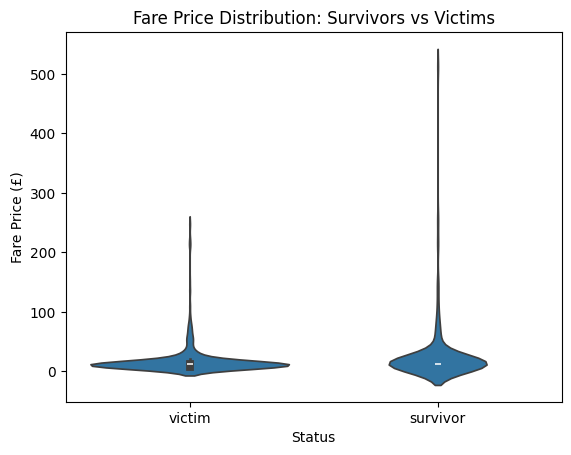

In [ ]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
df = df.dropna(subset=['Fare Price', 'Survived'])
survivors = df[df['Survived'] == 1]['Fare Price']
victims = df[df['Survived'] == 0]['Fare Price']
u, p = mannwhitneyu(survivors, victims, alternative='greater')
print("One Sided Mann Whitney U Test - Fare Price Distributions between survivors and victims")
print(f"U-statistic: {u}")
print(f"p-value: {p}")
if p < 0.05:
    print("Reject the null hypothesis as survivors tend to have higher ticket prices than victims.")
else:
    print("Fail to reject the null hypothesis as there is no evidence survivors paid higher ticket prices than victims.")
sns.violinplot(x='Status', y='Fare Price', data=df)
plt.title('Fare Price Distribution: Survivors vs Victims')
plt.xlabel('Status')
plt.ylabel('Fare Price (£)')
plt.show()

**Primary Analysis/Visualization**

The machine learning technique that we chose to use was logistic regression. We decided to use logistic regression because we wanted to see how a passenger with a given feature would have their odds of survival improve or worsen. It assigned each feature (1st class, 2nd class, 3rd class, male passenger, female passenger) an odds ratio. An odds ratio of 1 indicated that a passenger with a given feature would not see their survival odds improve or worsen if they have that feature, with odds ratios greater than 1 seeing an improved survival rate from having that feature, and an odds ratio less than 1 seeing worsened survival chances due to having that feature.


The graph shows that female and 1st class passengers had an odds ratio of exactly 1, setting both categories as the baseline for survival likelihood. Being a second class passenger came with an odds ratio of just above 0.4, meaning that one’s odds of survival worsened quite a bit in second class. Being a third class passenger worsened survival odds a good amount than being in second class did, with an odds ratio just above 0.2. Being a male passenger was the worst thing for one’s survival odds, carrying an odds ratio of less than 0.1.


Classification report (test set):
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       164
           1       0.72      0.68      0.70       100

    accuracy                           0.78       264
   macro avg       0.77      0.76      0.76       264
weighted avg       0.78      0.78      0.78       264

ROC–AUC: 0.841


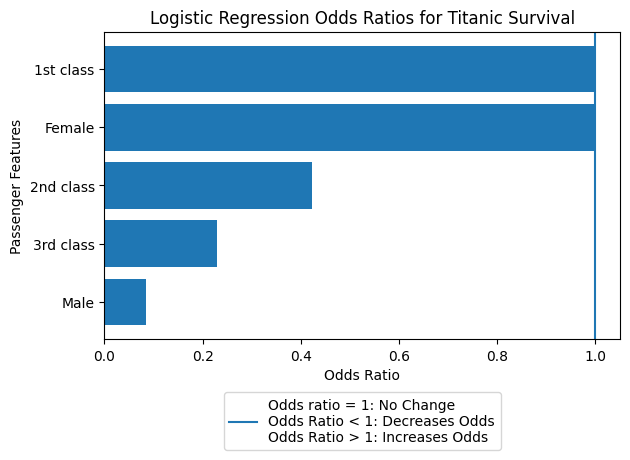

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model_df = df.copy()

model_df['Gender'] = model_df['Gender'].astype(str).str.strip().str.lower()
model_df['Class / Department'] = model_df['Class / Department'].astype(str).str.strip().str.lower()
model_df['Crew or Passenger?'] = model_df['Crew or Passenger?'].astype(str).str.strip().str.lower()

model_df = model_df[
    (model_df['Crew or Passenger?'] == 'passenger') &
    (model_df['Class / Department'].isin(['1st class', '2nd class', '3rd class']))
]

model_df = model_df.dropna(subset=['Survived', 'Fare Price', 'Gender', 'Class / Department'])

X = model_df[['Gender', 'Class / Department', 'Fare Price']]
y = model_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

numeric_features = ['Fare Price']
numeric_transformer = StandardScaler()

categorical_features = ['Gender', 'Class / Department']
categorical_transformer = OneHotEncoder(drop='first')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

log_reg_clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg_clf.fit(X_train, y_train)

y_pred = log_reg_clf.predict(X_test)
y_proba = log_reg_clf.predict_proba(X_test)[:, 1]

print("Classification report (test set):")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC–AUC: {roc_auc:.3f}")

ohe = log_reg_clf.named_steps['preprocess'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
num_feature_names = numeric_features

all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

coefficients = log_reg_clf.named_steps['model'].coef_[0]

coef_df = pd.DataFrame({
    'feature': all_feature_names,
    'coef_log_odds': coefficients
})

coef_df['odds_ratio'] = np.exp(coef_df['coef_log_odds'])

coef_df_no_fare = coef_df[coef_df['feature'] != 'Fare Price'].copy()

baseline_rows = pd.DataFrame({
    'feature': ['Gender_female', 'Class / Department_1st class'],
    'coef_log_odds': [0.0, 0.0],
    'odds_ratio': [1.0, 1.0]
})

coef_plot = pd.concat([coef_df_no_fare, baseline_rows], ignore_index=True)
coef_plot_sorted = coef_plot.sort_values('odds_ratio')
label_map = {
    'Gender_male': 'Male',
    'Gender_female': 'Female',
    'Class / Department_1st class': '1st class',
    'Class / Department_2nd class': '2nd class',
    'Class / Department_3rd class': '3rd class',
}
coef_plot_sorted['feature_clean'] = coef_plot_sorted['feature'].replace(label_map)
plt.barh(coef_plot_sorted['feature_clean'], coef_plot_sorted['odds_ratio'])
plt.axvline(x=1.0, label='Odds ratio = 1: No Change\nOdds Ratio < 1: Decreases Odds\nOdds Ratio > 1: Increases Odds')
plt.xlabel('Odds Ratio')
plt.ylabel('Passenger Features')
plt.title('Logistic Regression Odds Ratios for Titanic Survival')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()

**Insights and Conclusions**

A reader who knows nothing about how certain features like passenger class and gender influenced survival rate would be able to learn more about how these features affected survival rate after reading it. It shows the reader that survival rates were uneven amongst gender as well as class and fare price, giving the reader the conclusion that females had a much higher survival rate than males did, and that the higher class passenger groups also had higher survivor rates than the lower class passenger groups. In short, an uninformed reader would learn that females had higher survival odds than males did, and would also learn that the higher a passenger’s class was, the greater their odds of survival

A reader that already knew about the topic would not know it if they only knew the most basic facts of the disaster, and did not really learn much about how survival differed among various different passenger demographics.
